In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('smoking_health_data_final.csv')
df.tail(10)

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
3890,48,male,yes,80,136/81,60.0,232.0
3891,58,male,yes,75,150/97,60.0,250.0
3892,59,male,yes,70,153.5/105,60.0,298.0
3893,48,male,yes,70,104/73.5,60.0,252.0
3894,46,male,yes,70,121/82,60.0,285.0
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0
3899,40,male,yes,98,132/86,70.0,210.0


In [3]:
df.isnull().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [4]:
split_data = df['blood_pressure'].str.split('/', expand=True)
df['sys'] = split_data[0]
df['dia'] = split_data[1]

In [5]:
df['sys'] = pd.to_numeric(df['sys'])
df['dia'] = pd.to_numeric(df['dia'])
df['chol'] = pd.to_numeric(df['chol'])

In [6]:
df.tail(10)

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,sys,dia
3890,48,male,yes,80,136/81,60.0,232.0,136.0,81.0
3891,58,male,yes,75,150/97,60.0,250.0,150.0,97.0
3892,59,male,yes,70,153.5/105,60.0,298.0,153.5,105.0
3893,48,male,yes,70,104/73.5,60.0,252.0,104.0,73.5
3894,46,male,yes,70,121/82,60.0,285.0,121.0,82.0
3895,37,male,yes,88,122.5/82.5,60.0,254.0,122.5,82.5
3896,49,male,yes,70,123/75,60.0,213.0,123.0,75.0
3897,56,male,yes,70,125/79,60.0,246.0,125.0,79.0
3898,50,male,yes,85,134/95,60.0,340.0,134.0,95.0
3899,40,male,yes,98,132/86,70.0,210.0,132.0,86.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
 7   sys             3900 non-null   float64
 8   dia             3900 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 274.3+ KB


In [8]:
df.describe()

,age,heart_rate,cigs_per_day,chol,sys,dia
count,3900.000000,3900.000000,3886.000000,3893.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.168554,236.595941,132.395385,82.987179
std,8.559275,12.015376,12.037999,44.375365,21.976335,11.918623
min,32.000000,44.000000,0.000000,113.000000,83.500000,48.000000
25%,42.000000,68.000000,0.000000,206.000000,117.000000,75.000000
50%,49.000000,75.000000,0.000000,234.000000,128.000000,82.000000
75%,56.000000,82.000000,20.000000,263.000000,144.000000,90.000000
max,70.000000,143.000000,70.000000,696.000000,295.000000,142.500000


In [9]:
df.groupby(['sex','current_smoker'])[['age','cigs_per_day','chol','heart_rate']].median()

age  cigs_per_day   chol  heart_rate
sex    current_smoker                                       
female no              52.0           0.0  240.0        75.0
       yes             46.0          15.0  232.0        75.0
male   no              51.0           0.0  228.0        72.0
       yes             47.0          20.0  232.0        75.0

In [10]:
df.groupby(['sex','current_smoker'])[['age','cigs_per_day','chol','heart_rate']].mean()

age  cigs_per_day        chol  heart_rate
sex    current_smoker                                                 
female no              51.641148      0.000000  243.143541   76.581340
       yes             46.904474     13.909311  234.299879   77.484885
male   no              50.924370      0.000000  230.713080   72.243697
       yes             48.226244     22.113657  234.662125   75.558371

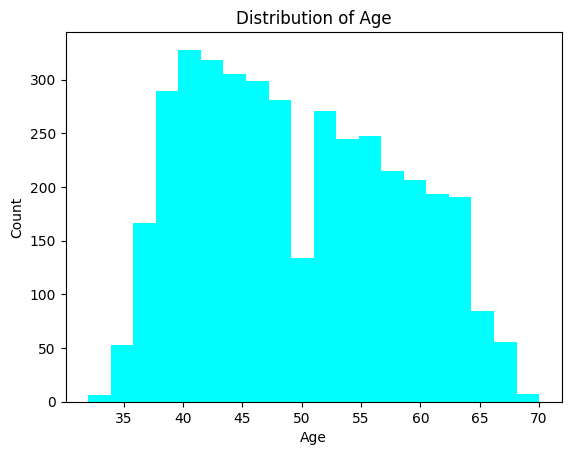

In [11]:
#Distribution of Ages
plt.hist(df['age'], bins=20, color='cyan')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


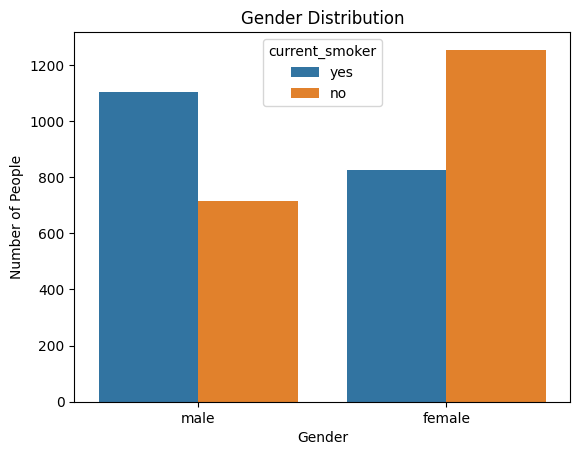

In [29]:
sns.countplot(x='sex', data=df, hue='current_smoker')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()

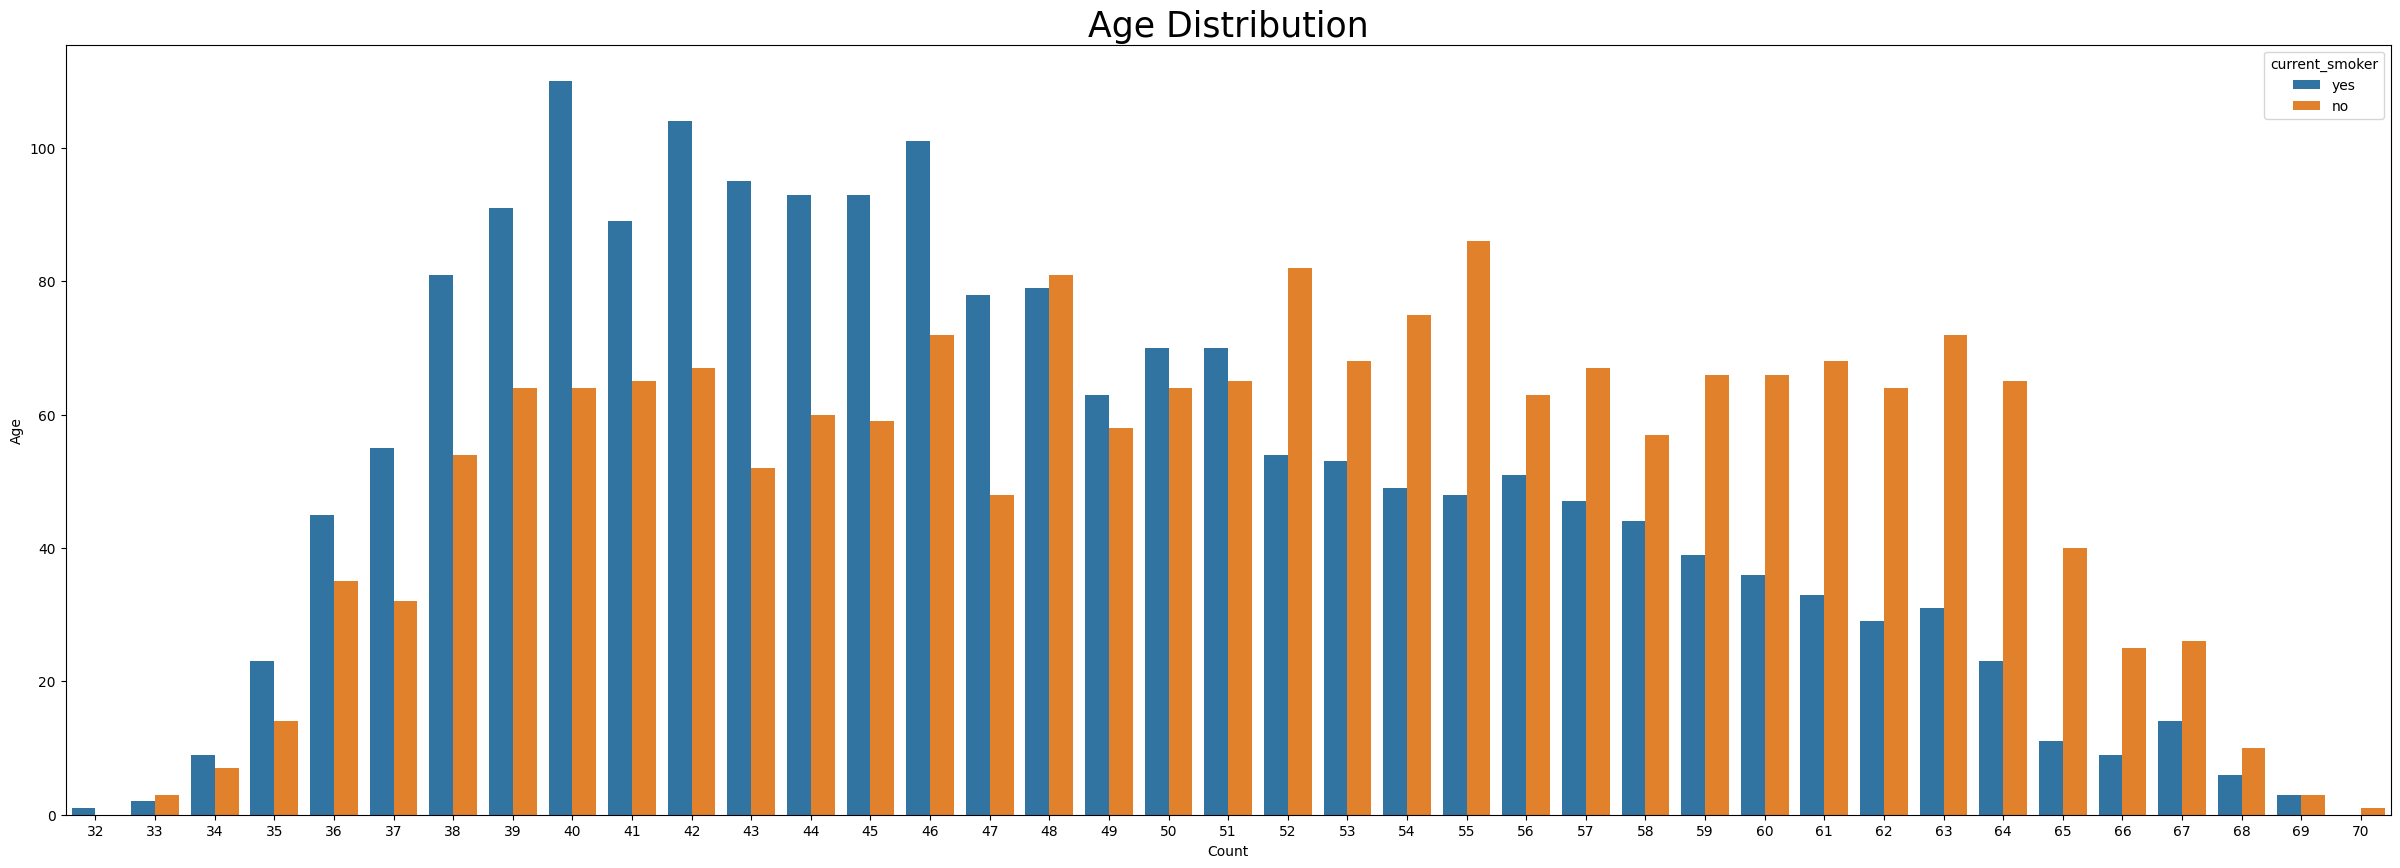

In [12]:
#Age Distribution according to smokers vs non-smokers
plt.figure(figsize=(30,10))
title = plt.title('Age Distribution', fontsize=25)
title.set_position([0.5, 1.15])
ax = sns.countplot(x='age', data=df, hue='current_smoker')
ax.set_xlabel('Count')
ax.set_ylabel('Age')
# a = ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment = 'right')
ax.titlesize = 'large'

Text(0.5, 1.0, 'X-Smoker')

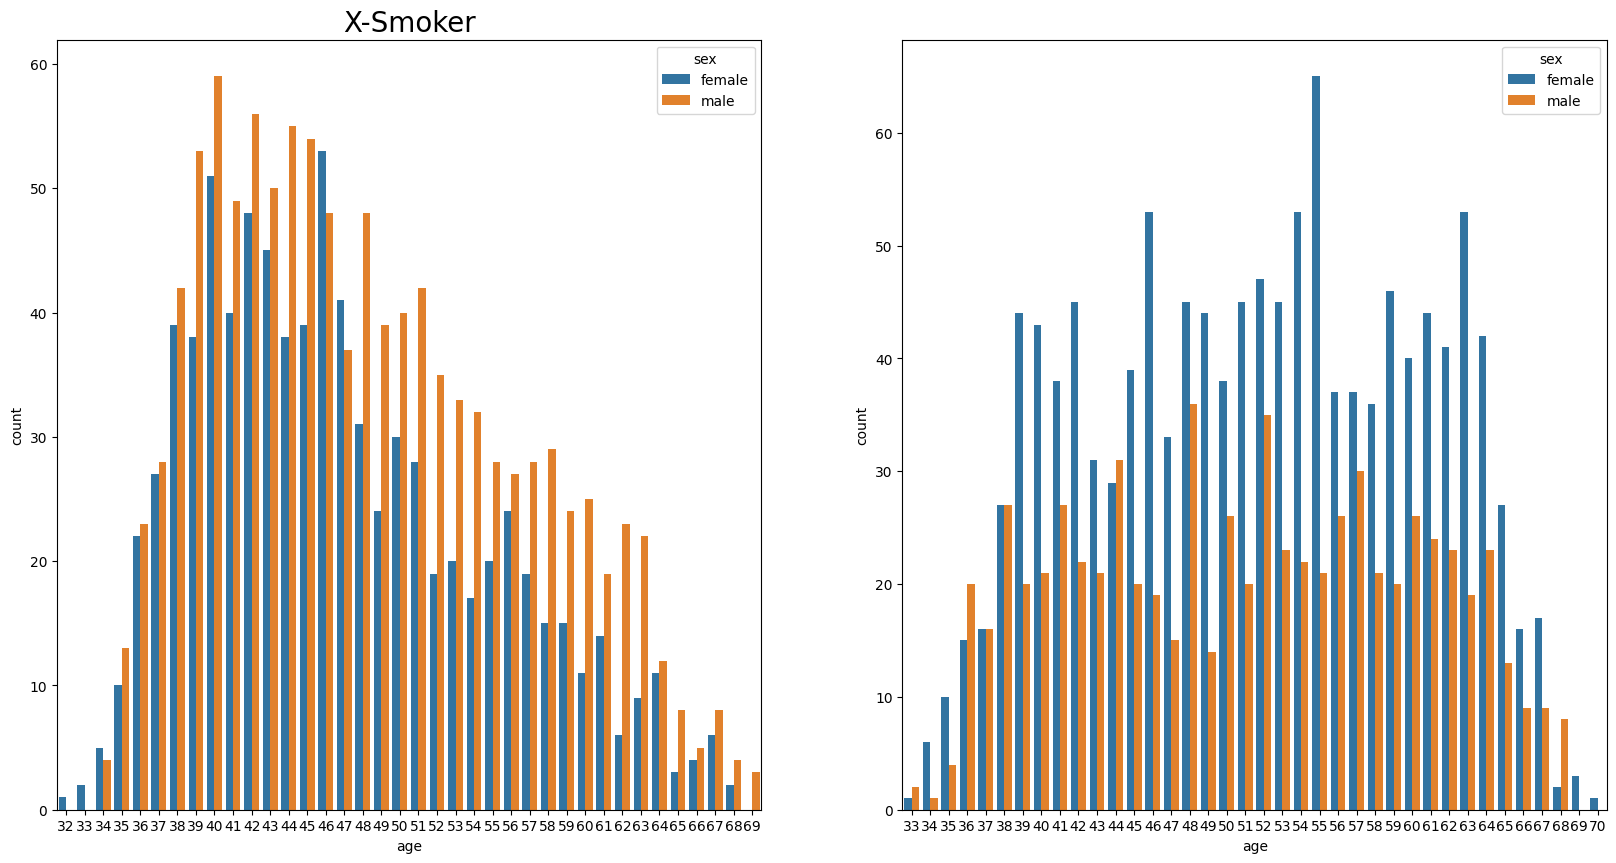

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,10))

chart = sns.countplot(data=df[df['current_smoker']=='yes'], x='age', hue='sex', ax=ax[0])
ax[0].set_title('Current Smoker', fontsize=20)

chart = sns.countplot(data=df[df['current_smoker']=='no'], x='age', hue='sex',ax=ax[1])
ax[0].set_title('X-Smoker', fontsize=20)

Text(0.5, 1.0, 'Heart Rate Distribution')

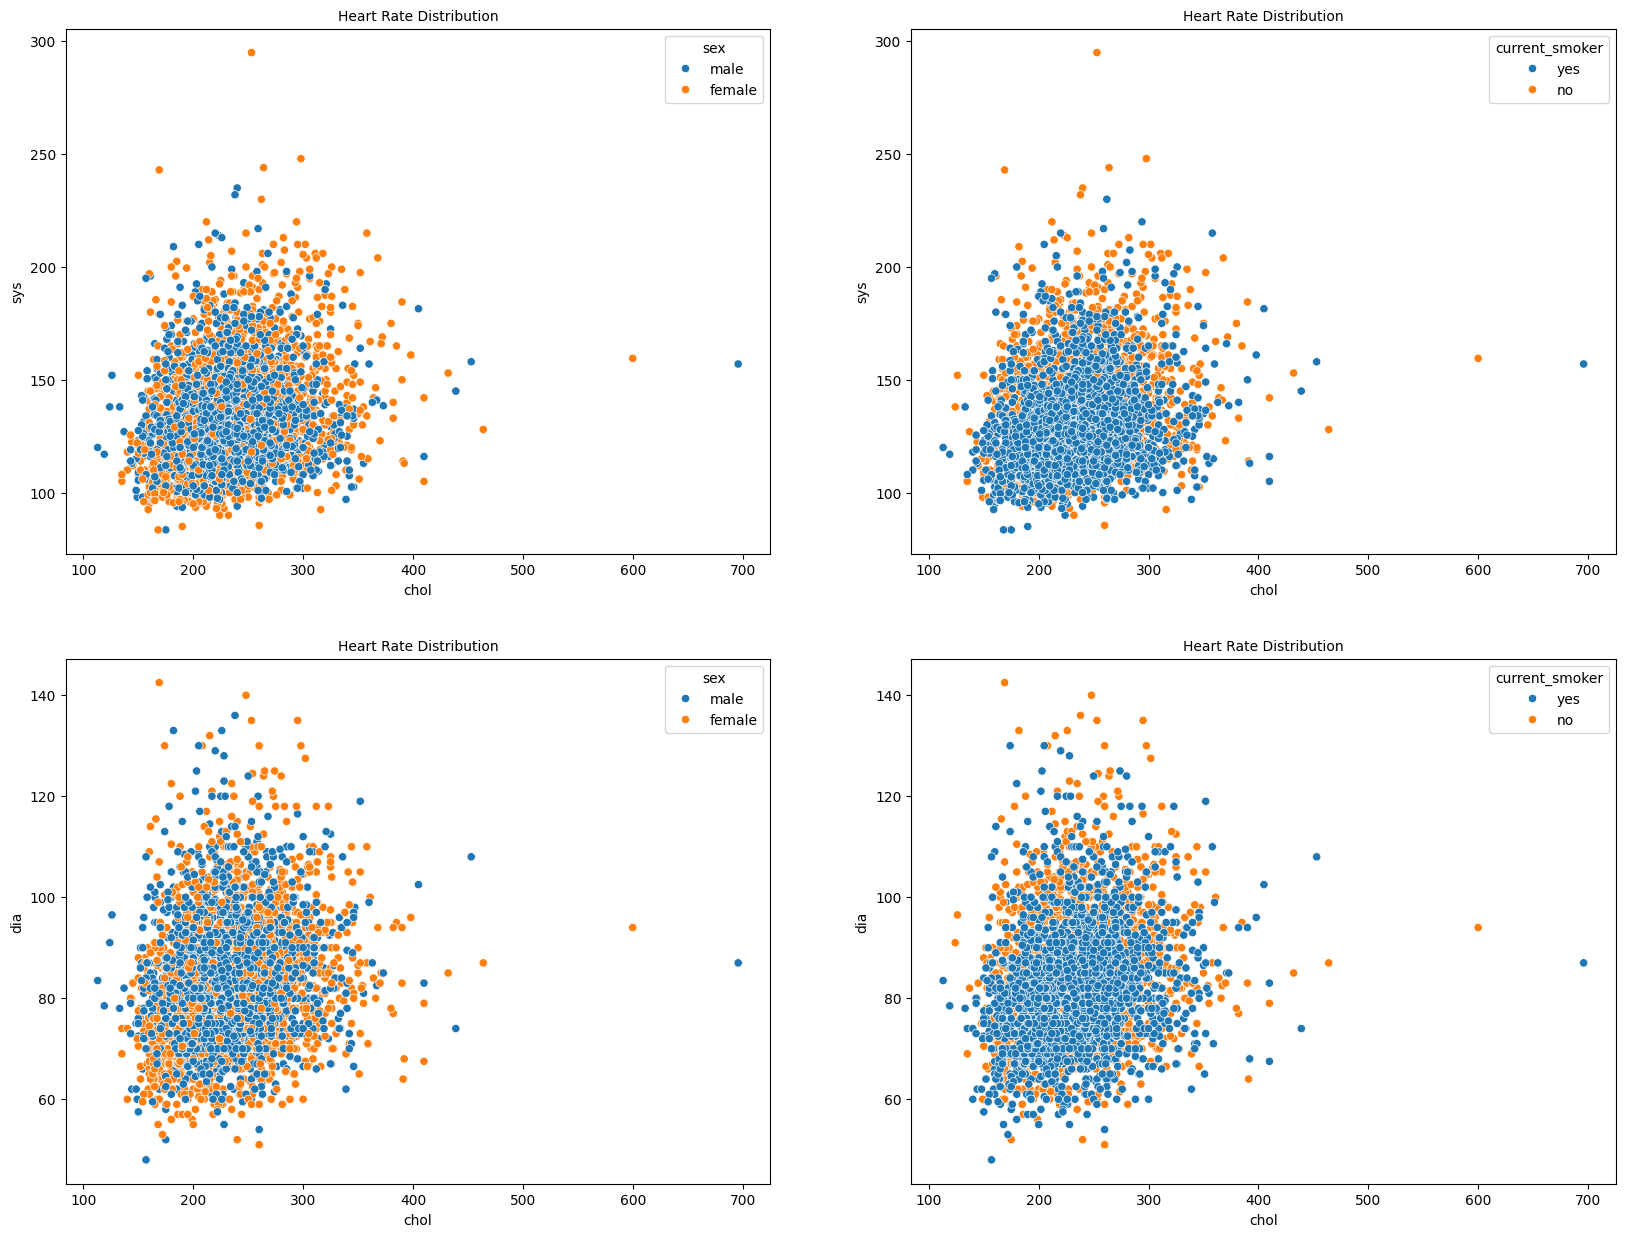

In [33]:
f,ax=plt.subplots(2,2,figsize=(20,15))

chart = sns.scatterplot(data=df, x='chol', y='sys', hue='sex', ax=ax[0,0])
ax[0,0].set_title('Heart Rate Distribution', fontsize=10)

chart = sns.scatterplot(data=df, x='chol', y='sys', hue='current_smoker', ax=ax[0,1])
ax[0,1].set_title('Heart Rate Distribution', fontsize=10)

chart = sns.scatterplot(data=df, x='chol', y='dia', hue='sex', ax=ax[1,0])
ax[1,0].set_title('Heart Rate Distribution', fontsize=10)

chart = sns.scatterplot(data=df, x='chol', y='dia', hue='current_smoker', ax=ax[1,1])
ax[1,1].set_title('Heart Rate Distribution', fontsize=10)

In [15]:
age_counts = df['age'].value_counts()
age_counts


age
40    174
46    173
42    171
48    160
39    155
41    154
44    153
45    152
43    147
52    136
51    135
38    135
50    134
55    134
47    126
54    124
53    121
49    121
57    114
56    114
59    105
63    103
60    102
58    101
61    101
62     93
64     88
37     87
36     80
65     51
67     40
35     37
66     34
34     16
68     16
69      6
33      5
70      1
32      1
Name: count, dtype: int64

In [16]:
fig = px.bar(age_counts, title='Age')
fig.update_layout(
    xaxis_title = 'Age',
    yaxis_title = 'Frequency',
    title_x = 0.5,
    showlegend = False
)
fig.show()

In [17]:
# Age Group Distribution
age_groups = pd.cut(df['age'], bins=range(20, 81, 10))
age_groups

0       (50, 60]
1       (40, 50]
2       (50, 60]
3       (40, 50]
4       (40, 50]
          ...   
3895    (30, 40]
3896    (40, 50]
3897    (50, 60]
3898    (40, 50]
3899    (30, 40]
Name: age, Length: 3900, dtype: category
Categories (6, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

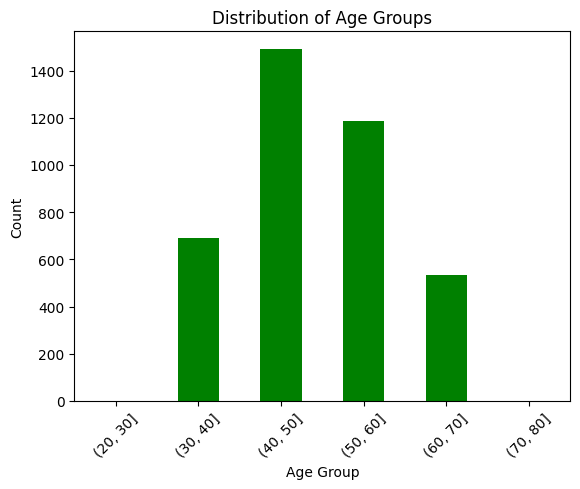

In [18]:
age_groups.value_counts().sort_index().plot(kind='bar', color='green')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

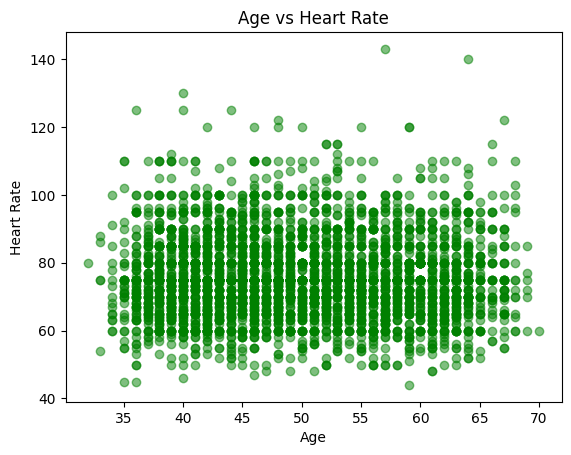

In [19]:
#Determine Age vs Heart Rate
plt.scatter(df['age'], df['heart_rate'], alpha=0.5, color='green')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs Heart Rate')
plt.show()

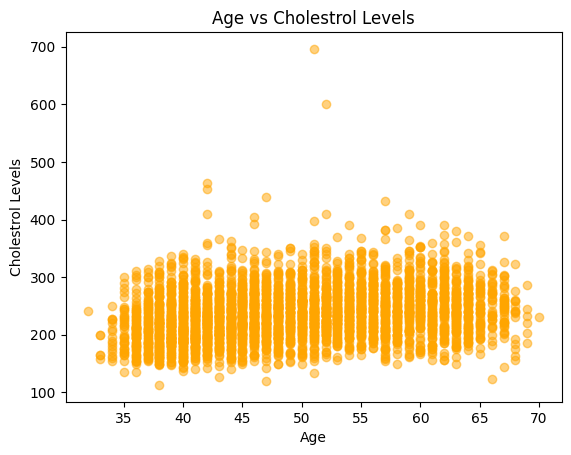

In [20]:
#Age vs Cholestrol levels
plt.scatter(df['age'], df['chol'], alpha=0.5, color='orange')
plt.xlabel('Age')
plt.ylabel('Cholestrol Levels')
plt.title('Age vs Cholestrol Levels')
plt.show()

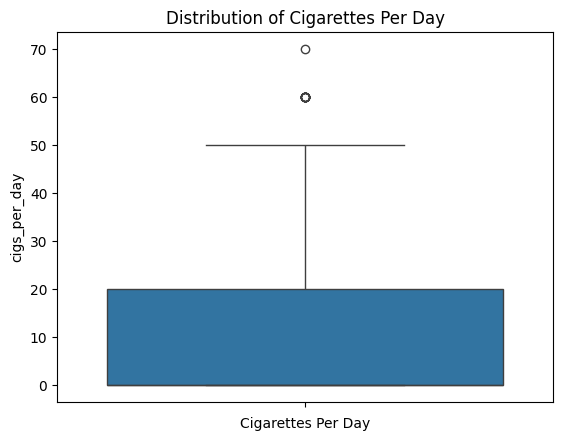

In [21]:
#Boxplot of Cigarettes Per Day
sns.boxplot(df['cigs_per_day'])
plt.xlabel('Cigarettes Per Day')
plt.title('Distribution of Cigarettes Per Day')
plt.show()

In [22]:
average_heart_rate = df.groupby('current_smoker')['heart_rate'].mean()
average_heart_rate

current_smoker
no     75.007622
yes    76.383023
Name: heart_rate, dtype: float64

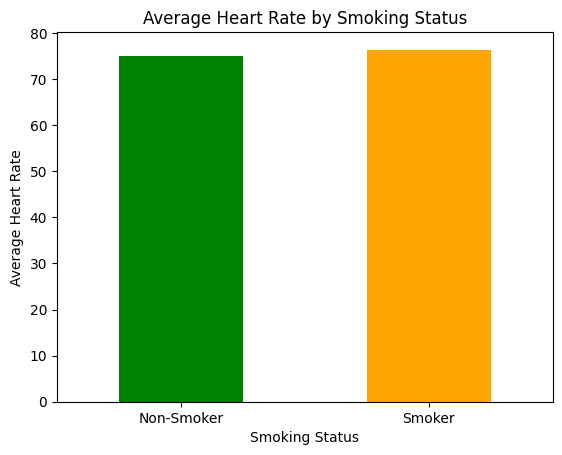

In [23]:
average_heart_rate.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Smoking Status')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate by Smoking Status')
plt.xticks([0,1], ['Non-Smoker','Smoker'], rotation=0)
plt.show()


In [24]:
average_cholestrol = df.groupby('current_smoker')['chol'].mean()
average_cholestrol

current_smoker
no     238.645802
yes    234.506743
Name: chol, dtype: float64

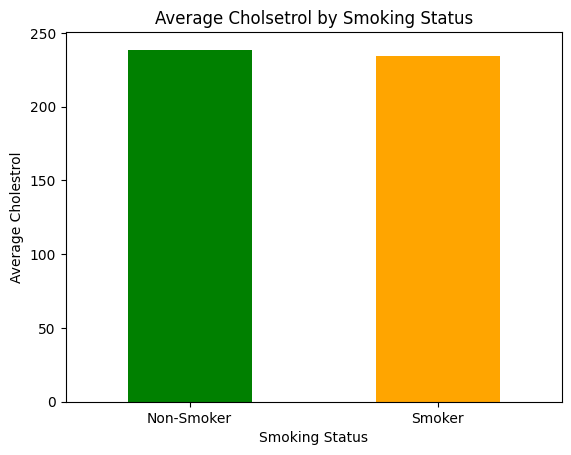

In [25]:
#Average Cholsetrol by Smoking Status
average_cholestrol.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Smoking Status')
plt.ylabel('Average Cholestrol')
plt.title('Average Cholsetrol by Smoking Status')
plt.xticks([0,1], ['Non-Smoker','Smoker'], rotation=0)
plt.show()

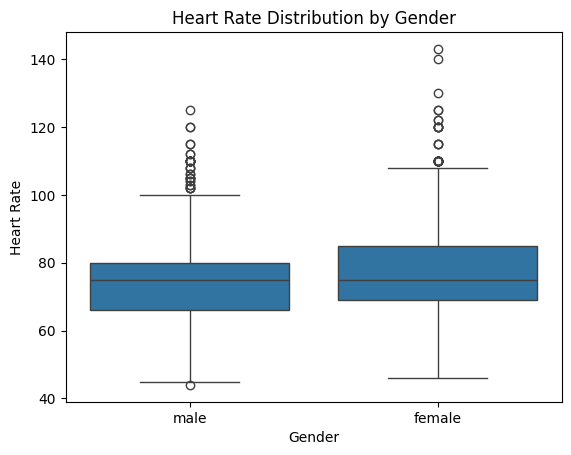

In [26]:
# Heart Rate by Gender
sns.boxplot(x=df['sex'], y =df['heart_rate'])
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Distribution by Gender')
plt.show()

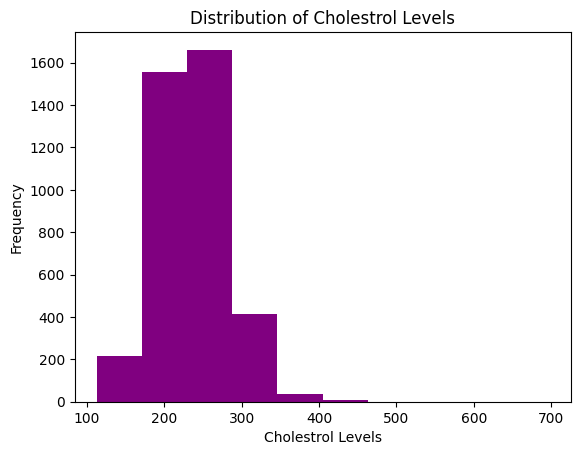

In [27]:
#Distribution of Cholestrol Levels
plt.hist(df['chol'], color='purple')
plt.xlabel('Cholestrol Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Cholestrol Levels')
plt.show()

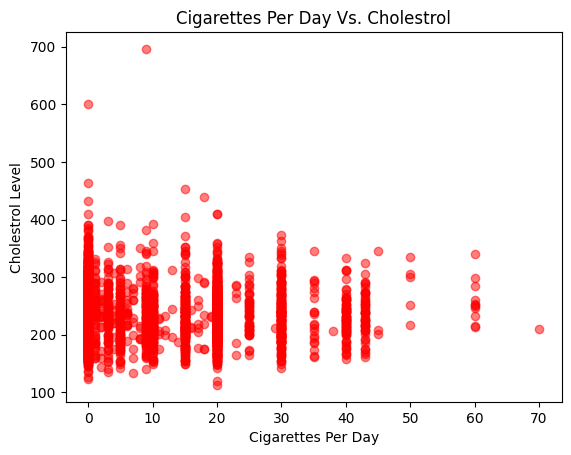

In [28]:
#Cigarettes Per Day Vs Cholestrol
plt.scatter(df['cigs_per_day'], df['chol'], alpha = 0.5, color = 'red')
plt.title('Cigarettes Per Day Vs. Cholestrol')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Cholestrol Level')
plt.show()